In [ ]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
from IPython import get_ipython


In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # dataviz
import seaborn as sns # dataviz
from pandas.plotting import scatter_matrix

Rental= pd.read_csv("./dataset/immo_data.csv")

get_ipython().run_line_magic('matplotlib', 'inline')


In [ ]:
Rental.info()

In [ ]:
Rental.describe() #shows a summary of the numerical attributes


In [5]:
Berlin=Rental.loc[Rental["regio2"]=='Berlin']



In [ ]:
Berlin.shape

In [6]:
corr_matrix = Berlin.corr()
corr_matrix["totalRent"].sort_values(ascending=False)


totalRent                   1.000000
baseRent                    0.876431
livingSpace                 0.747748
serviceCharge               0.701983
baseRentRange               0.630741
livingSpaceRange            0.629388
noRoomsRange                0.517548
heatingCosts                0.439351
noRooms                     0.415801
picturecount                0.297007
hasKitchen                  0.220137
lift                        0.197116
yearConstructedRange        0.179634
balcony                     0.145889
cellar                      0.105148
newlyConst                  0.097460
garden                      0.097199
floor                       0.068278
yearConstructed             0.066111
numberOfFloors              0.041601
lastRefurbish               0.034407
pricetrend                  0.015857
electricityBasePrice        0.006113
electricityKwhPrice        -0.006113
scoutId                    -0.025795
noParkSpaces               -0.038506
telekomUploadSpeed         -0.062011
t

In [ ]:
attributes = ["baseRent","totalRent","livingSpace", "serviceCharge", "noRooms","heatingCosts","picturecount"]
scatter_matrix(Berlin[attributes], figsize=(16, 12))
scatter_matrix


In [7]:
Berlin["totalRent"].describe()


count     9743.000000
mean      1386.728040
std       1133.166905
min          0.000000
25%        792.055000
50%       1124.330000
75%       1685.000000
max      51570.000000
Name: totalRent, dtype: float64

Text(0, 0.5, 'Count')

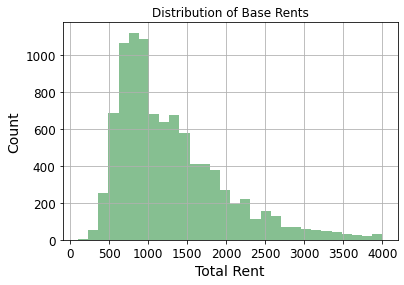

In [8]:
Berlin['totalRent'].hist(bins=30, range=(100,4000), grid=True, color='#86bf91')
plt.title('Distribution of Base Rents')
plt.xlabel('Total Rent')
plt.ylabel('Count')


In [ ]:
Berlin.plot(kind="scatter", x="livingSpace", y="totalRent", alpha=0.1)


In [ ]:
Berlin.plot(kind="scatter", x="yearConstructed", y="totalRent", alpha=0.1)

In [9]:
m=Berlin.groupby(['regio3'])['baseRent'].mean()
m.sort_values()


regio3
Marzahn_Marzahn                           500.651438
Hellersdorf_Hellersdorf                   546.908897
Haselhorst_Spandau                        608.990000
Staaken_Spandau                           610.255091
Neu_Hohenschönhausen_Hohenschönhausen     612.841250
                                            ...     
Rummelsburg_Lichtenberg                  1776.020000
Dahlem_Zehlendorf                        1808.883448
Gatow_Spandau                            1825.090000
Mitte_Mitte                              1896.462699
Grunewald_Wilmersdorf                    2449.683763
Name: baseRent, Length: 79, dtype: float64

In [10]:
#droping initial columns
cols_to_drop = ["telekomHybridUploadSpeed", "picturecount", "telekomUploadSpeed",
                "geo_bln", "houseNumber", "geo_krs", "geo_plz", "regio3", "description",
                "facilities"]

Berlin = Berlin.drop(cols_to_drop, axis=1)

#Columns with several NULL entries are dropped too.

Berlin.isna().sum()

#filter columns for berlin
Berlin = Berlin[Berlin["regio2"]=="Berlin"]

#sorting and re_indexing regarding to the price
Berlin = Berlin.sort_values(by=['totalRent'])
Berlin = Berlin.reset_index(drop=True)

#filter some columns between specific amount of values
Berlin = Berlin.query("totalRent >= 100").query("totalRent<10000")
Berlin = Berlin.query("baseRent >= 100").query("baseRent<10000")
Berlin = Berlin.query("livingSpace >= 10").query("livingSpace<400")
Berlin = Berlin.query("noRooms >= 0").query("noRooms<15")




# Replacing columns with f/t with 0/1
Berlin.replace({False: 0, True: 1}, inplace=True)


In [11]:
#make a single binary variable to indicate if the apartment is refurbished/new
Berlin['refurbished'] = (Berlin.condition == 'refurbished') | (Berlin.condition == 'first_time_use') | (Berlin.condition == 'mint_condition') | (Berlin.condition == 'fully_renovated') | (Berlin.condition == 'first_time_use_after_refurbishment')

#make a binary variable to indicate if the rental property has good interior
Berlin['greatInterior'] = (Berlin.interiorQual == 'sophisticated') | (Berlin.interiorQual == 'luxury')

#make a binary variable to indicated if the rental property has good heating
Berlin['goodHeating'] = (Berlin.heatingType == 'central_heating') | (Berlin.heatingType == 'floor_heating') | (Berlin.heatingType == 'self_contained_central_heating')

#make a binary variable to identify rental ads from last year to factor in any inflationary effects.
Berlin['2018_ads'] = (Berlin.date == 'Sep18')

#transform totalRent into log(totalRent) to get a better distribution + better interpretive quality
Berlin['logRent'] = np.log(Berlin['totalRent'])


In [70]:
y_var = ['logRent']
X_var = ['balcony', 'hasKitchen', 'cellar', 'livingSpace', 'noRooms', 'garden', 'baseRent',
         'refurbished', 'greatInterior', 'newlyConst',
         '2018_ads', 'lift']

#print(Berlin[X_var])
#y = Berlin[y_var].iloc[:,0].values
#X = Berlin[X_var].iloc[:,0].values
y = Berlin[y_var].values
X = Berlin[X_var].values

print(X)
#print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=0)


[[1 1 0 ... 0 False 1]
 [0 0 0 ... 0 False 0]
 [0 0 0 ... 0 False 0]
 ...
 [1 1 1 ... 0 True 1]
 [0 1 1 ... 0 True 0]
 [1 1 1 ... 0 False 1]]


In [265]:
X_train.shape

(7772, 12)

In [266]:
X_test.shape

(1943, 12)

# Start fine tunning ---------------------------------

In [ ]:
## 1. Regression model

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
tree_scores = cross_val_score(tree_reg, X_train, y_train,
                              scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
tree_rmse_scores

array([0.3189565 , 0.30487152, 0.31061153, 0.33701766, 0.32190146,
       0.32958494, 0.31095985, 0.30495727, 0.31954354, 0.32075903])

In [20]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.3189565  0.30487152 0.31061153 0.33701766 0.32190146 0.32958494
 0.31095985 0.30495727 0.31954354 0.32075903]
Mean: 0.31791632963469874
Standard deviation: 0.009841576888414107


In [71]:
from sklearn.linear_model import LinearRegression

lin_scores = cross_val_score(tree_reg, X_test, y_test,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.0762819  0.07915758 0.07214748 0.09011073 0.06901312 0.0740699
 0.07410428 0.07173882 0.07696437 0.07941896]
Mean: 0.07630071375519068
Standard deviation: 0.0055678778682828


In [73]:
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
prediction = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, prediction)
forest_rmse = np.sqrt(forest_mse)
print("rmse:", final_rmse)
print("mse:", final_mse)

rmse: 0.22587788664599673
mse: 0.051020819675661744


In [74]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X_test, y_test,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.0581399  0.06081953 0.05219619 0.06390476 0.04973088 0.0575945
 0.06146312 0.05846691 0.05494303 0.06043647]
Mean: 0.0577695274783966
Standard deviation: 0.004147577782991299


In [75]:

scores = cross_val_score(forest_reg, X_test, y_test, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      0.057869
std       0.004315
min       0.049728
25%       0.056043
50%       0.059051
75%       0.060623
max       0.063524
dtype: float64

### Grid Search

In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 11]},
        {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    ]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 11],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [77]:
grid_search.best_params_


{'max_features': 6, 'n_estimators': 30}

In [78]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [79]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.1123168177803316 {'max_features': 2, 'n_estimators': 3}
0.09696769609992856 {'max_features': 2, 'n_estimators': 10}
0.08732401854075995 {'max_features': 2, 'n_estimators': 30}
0.08384295258063569 {'max_features': 4, 'n_estimators': 3}
0.07072222384781357 {'max_features': 4, 'n_estimators': 10}
0.06693785111725717 {'max_features': 4, 'n_estimators': 30}
0.07438673597625903 {'max_features': 6, 'n_estimators': 3}
0.06459463780627674 {'max_features': 6, 'n_estimators': 10}
0.062068650003683404 {'max_features': 6, 'n_estimators': 30}
0.06954437152137523 {'max_features': 11, 'n_estimators': 3}
0.06453981751344721 {'max_features': 11, 'n_estimators': 10}
0.06274089345541194 {'max_features': 11, 'n_estimators': 30}
0.11076807536674264 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.0913083301349406 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.09237010798989517 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.07720118668788671 {'bootstrap': False, 'ma

In [80]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor()
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error')
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f450b213df0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f450b092130>},
                   scoring='neg_mean_squared_error')

In [81]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 88}

In [82]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=88)

In [83]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.10097021861624107 {'max_features': 1, 'n_estimators': 140}
0.06176380644960688 {'max_features': 5, 'n_estimators': 160}
0.1008449817720271 {'max_features': 1, 'n_estimators': 101}
0.0998651665728458 {'max_features': 1, 'n_estimators': 162}
0.060500597912505026 {'max_features': 7, 'n_estimators': 88}
0.08683381062917764 {'max_features': 2, 'n_estimators': 48}
0.07196837688744791 {'max_features': 3, 'n_estimators': 121}
0.06076142369580466 {'max_features': 6, 'n_estimators': 196}
0.07115246270439385 {'max_features': 3, 'n_estimators': 188}
0.08470885886028463 {'max_features': 2, 'n_estimators': 112}


In [84]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.06359689e-03, 9.07166952e-03, 7.57904317e-04, 1.79207625e-01,
       6.42397101e-02, 5.60557717e-04, 7.20443305e-01, 5.55105668e-03,
       1.53239711e-02, 6.60795782e-04, 5.30962338e-04, 2.58884488e-03])

In [85]:
final_model = grid_search.best_estimator_

#X_test = strat_test_set.drop("median_house_value", axis=1)
#y_test = strat_test_set["median_house_value"].copy()

#X_test_transformed = preparation_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("rmse:", final_rmse)
print("mse:", final_mse)

rmse: 0.05470201831391592
mse: 0.0029923108076159925


## fine tunning GradientBoosting -----------------------------------------------

In [24]:
y_var = ['logRent']
X_var = ['balcony', 'hasKitchen', 'cellar', 'livingSpace', 'noRooms', 'garden',
         'refurbished', 'greatInterior', 'newlyConst',
         '2018_ads', 'lift']

#print(Berlin[X_var])
#y = Berlin[y_var].iloc[:,0].values
#X = Berlin[X_var].iloc[:,0].values
y = Berlin[y_var].values
X = Berlin[X_var].values

print(X)
#print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=0)


[[1 1 0 ... 0 False 1]
 [0 0 0 ... 0 False 0]
 [0 0 0 ... 0 False 0]
 ...
 [1 1 1 ... 0 True 1]
 [0 1 1 ... 0 True 0]
 [1 1 1 ... 0 False 1]]


In [ ]:
"""from sklearn.model_selection import cross_val_score

from sklearn.ensemble import GradientBoostingRegressor


gradient_reg = GradientBoostingRegressor()
gradient_reg.fit(X_train, y_train)

gradient_scores = cross_val_score(gradient_reg, X_train, y_train,
                              scoring="neg_mean_squared_error", cv=10)
gradient_rmse_scores = np.sqrt(-gradient_scores)"""

In [ ]:
"""gradient_scores = cross_val_score(gradient_reg, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
gradient_rmse_scores = np.sqrt(-gradient_scores)
display_scores(gradient_rmse_scores)"""

# Check if works

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

grad_reg = GradientBoostingRegressor()
grad_reg.fit(X_train, y_train)
housing_predictions = grad_reg.predict(X_train)
grad_mse = mean_squared_error(y_train, housing_predictions)
grad_rmse = np.sqrt(grad_mse)
grad_rmse

0.2713313707588161

In [21]:
from sklearn.model_selection import cross_val_score

grad_scores = cross_val_score(grad_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
grad_rmse_scores = np.sqrt(-grad_scores)
display_scores(grad_rmse_scores)

Scores: [0.27975656 0.27888882 0.27258279 0.28999803 0.26419543 0.28516059
 0.27265142 0.2711727  0.27721859 0.28392854]
Mean: 0.2775553480486472
Standard deviation: 0.007266463219789613


In [22]:
scores = cross_val_score(grad_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      0.277555
std       0.007660
min       0.264195
25%       0.272600
50%       0.278054
75%       0.282886
max       0.289998
dtype: float64

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
param_grid = [
        {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 11]},
        {'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    ]

gradientBoosting_reg = GradientBoostingRegressor()

gradientBoosting_search = GridSearchCV(gradientBoosting_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
gradientBoosting_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 11],
                          'n_estimators': [3, 10, 30]},
                         {'max_features': [2, 3, 4], 'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [26]:
gradientBoosting_search.best_params_


{'max_features': 11, 'n_estimators': 30}

In [27]:
gradientBoosting_search.best_estimator_


GradientBoostingRegressor(max_features=11, n_estimators=30)

In [28]:
cvres = gradientBoosting_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.46377010884313274 {'max_features': 2, 'n_estimators': 3}
0.36800996260874624 {'max_features': 2, 'n_estimators': 10}
0.271806987413052 {'max_features': 2, 'n_estimators': 30}
0.4461510445743106 {'max_features': 4, 'n_estimators': 3}
0.3297291601841742 {'max_features': 4, 'n_estimators': 10}
0.24252979951743475 {'max_features': 4, 'n_estimators': 30}
0.4384540489120546 {'max_features': 6, 'n_estimators': 3}
0.31678519767675895 {'max_features': 6, 'n_estimators': 10}
0.2381587709520288 {'max_features': 6, 'n_estimators': 30}
0.4315272796496659 {'max_features': 11, 'n_estimators': 3}
0.30568569914881055 {'max_features': 11, 'n_estimators': 10}
0.23435032792255397 {'max_features': 11, 'n_estimators': 30}
0.4659665743853873 {'max_features': 2, 'n_estimators': 3}
0.3645485615943022 {'max_features': 2, 'n_estimators': 10}
0.4580247190563841 {'max_features': 3, 'n_estimators': 3}
0.34318461287663243 {'max_features': 3, 'n_estimators': 10}
0.44850864339029634 {'max_features': 4, 'n_estimators

In [29]:

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

gradientBoost_reg = GradientBoostingRegressor()
gradientBoost_search = RandomizedSearchCV(gradientBoost_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error')
gradientBoost_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f450b3b0610>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f450b349ac0>},
                   scoring='neg_mean_squared_error')

In [30]:
gradientBoost_search.best_params_

{'max_features': 5, 'n_estimators': 178}

In [31]:
gradientBoost_search.best_estimator_

GradientBoostingRegressor(max_features=5, n_estimators=178)

In [32]:
cvres = gradientBoost_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.2248448125068549 {'max_features': 5, 'n_estimators': 178}
0.2253089063665248 {'max_features': 6, 'n_estimators': 117}
0.2483069715123192 {'max_features': 1, 'n_estimators': 92}
0.2272543619645991 {'max_features': 5, 'n_estimators': 81}
0.24657630285776141 {'max_features': 4, 'n_estimators': 28}
0.22621916847588752 {'max_features': 7, 'n_estimators': 89}
0.22907186795558263 {'max_features': 7, 'n_estimators': 47}
0.2261306732383975 {'max_features': 5, 'n_estimators': 123}
0.2262041273447262 {'max_features': 7, 'n_estimators': 100}
0.22659956098378106 {'max_features': 5, 'n_estimators': 87}


In [33]:
feature_boost_importances = gradientBoost_search.best_estimator_.feature_importances_
feature_boost_importances

array([1.34358002e-03, 4.94606906e-02, 1.58961833e-03, 7.22594073e-01,
       1.31086360e-01, 6.58561118e-04, 3.11969196e-02, 2.97493042e-02,
       8.34618969e-03, 7.95595334e-04, 2.31791079e-02])

In [37]:
final_model = gradientBoost_search.best_estimator_
#X_test = strat_test_set.drop("median_house_value", axis=1)
#y_test = strat_test_set["median_house_value"].copy()

#X_test_transformed = preparation_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("final_rmse:", final_rmse)
print("final_mse:", final_mse)

final_rmse: 0.22587788664599673
final_mse: 0.051020819675661744


# Models ----------------------------------------

In [61]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

y_var = ['logRent']
X_var = ['balcony', 'hasKitchen', 'cellar', 'livingSpace', 'noRooms', 'garden', 
         'refurbished', 'greatInterior', 'newlyConst',
         '2018_ads', 'lift']

#print(Berlin[X_var])

y = Berlin[y_var].iloc[:,0].values
X = Berlin[X_var].iloc[:,3].values
#y = Berlin[y_var].values
#X = Berlin[X_var].values

#print(X)
#print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7772,)
(1943,)
(7772,)
(1943,)


In [48]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn import metrics

def linear__regression(xtrain, ytrain, xtest, ytest):
    linreg = LinearRegression()
    linreg.fit(xtrain, ytrain)
    y_pred = linreg.predict(xtest)
    
    print('MAE:', metrics.mean_absolute_error(ytest, y_pred))
    print('MSE:', metrics.mean_squared_error(ytest, y_pred))

linear__regression(X_train.reshape(-1, 1), y_train.reshape(-1, 1),
                 X_test.reshape(-1, 1), y_test.reshape(-1, 1))


MAE: 0.24699624620357102
MSE: 0.09332275388108151


In [49]:

from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
#linear_regressor.fit(np.array(X_train.reshape(-1, 1)), y_train.reshape(-1, 1))
linear_regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
                     

y_predict = linear_regressor.predict(X_train.reshape(-1,1))
print(y_predict)

[[6.57070402]
 [8.20573271]
 [7.01324964]
 ...
 [6.77316677]
 [6.94304684]
 [6.78024064]]


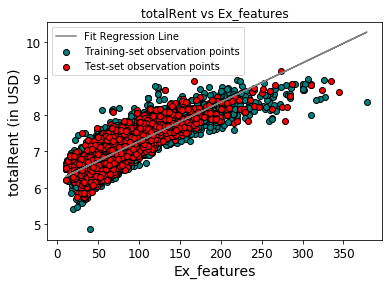

In [50]:
# Plot points and fit line for training data
plt.scatter(X_train, y_train, color='teal', edgecolors='black', label='Training-set observation points')
plt.plot(X_train, y_predict, color='grey', label='Fit Regression Line')
plt.title('totalRent vs Ex_features')
plt.xlabel('Ex_features')
plt.ylabel('totalRent (in USD)')

# plot scatter points and line for test data
plt.scatter(X_test, y_test, color='red', edgecolors='black', label='Test-set observation points')
plt.legend()
plt.show()

In [86]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

y_var = ['logRent']
X_var = ['balcony', 'hasKitchen', 'cellar', 'livingSpace', 'noRooms', 'garden', 
         'refurbished', 'greatInterior', 'newlyConst',
         '2018_ads', 'lift']

#print(Berlin[X_var])

y = Berlin[y_var].iloc[:,0].values
X = Berlin[X_var].iloc[:,3:4].values
#y = Berlin[y_var].values
#X = Berlin[X_var].values

#print(X)
#print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7772, 1)
(1943, 1)
(7772,)
(1943,)


In [87]:

#RANDOM FOREST
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

def randomforestreg(msl, mf, md, xtrain, ytrain, xtest, ytest):
    rfr_best = RandomForestRegressor(n_estimators=70, random_state=1111,
                                     max_depth=md, max_features=mf, min_samples_leaf=msl)
    rfr_best.fit(xtrain,ytrain)
    y_pred_rfr = rfr_best.predict(xtrain)
    print('MAE:', metrics.mean_absolute_error(ytest, y_pred_rfr))
    print('MSE:', metrics.mean_squared_error(ytest, y_pred_rfr))
    return y_pred_rfr
#forest_regressor = randomforestreg(10, 6, 30, X_train, y_train, X_test, y_test)


In [70]:
"""from sklearn.svm import SVR

scale_X = StandardScaler()
scale_y = StandardScaler()

X = scale_X.fit_transform(X.reshape(-1,1))
y = scale_y.fit_transform(y.reshape(-1,1))"""

In [88]:
from sklearn.ensemble import RandomForestRegressor
"""forest_regressor = RandomForestRegressor(n_estimators = 30, random_state = 1111,
                                         max_depth=30, max_features=6, min_samples_leaf=10)"""

forest_regressor = RandomForestRegressor(n_estimators = 30, random_state = 42)
forest_regressor.fit(X_train, y_train)


X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)

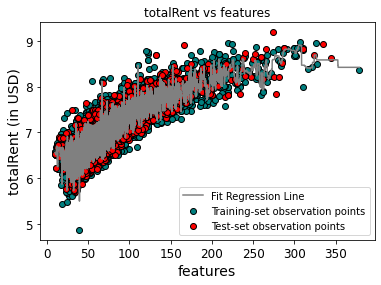

In [90]:

# Plot points and fit line for training data
plt.scatter(X_train, y_train, color='teal', edgecolors='black', label='Training-set observation points')
plt.plot(X_grid, forest_regressor.predict(X_grid), color='grey', label='Random Regressor Line')
plt.title('totalRent vs features')
plt.xlabel('features')
plt.ylabel('totalRent (in USD)')

# plot scatter points and line for test data
plt.scatter(X_test, y_test, color='red', edgecolors='black', label='Test-set observation points')
plt.legend()
plt.show()

In [54]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

y_var = ['logRent']
X_var = ['balcony', 'hasKitchen', 'cellar', 'livingSpace', 'noRooms', 'garden', 
         'refurbished', 'greatInterior', 'newlyConst',
         '2018_ads', 'lift']

#print(Berlin[X_var])

y = Berlin[y_var].iloc[:,0].values
X = Berlin[X_var].iloc[:,3].values
#y = Berlin[y_var].values
#X = Berlin[X_var].values

#print(X)
#print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7772,)
(1943,)
(7772,)
(1943,)


In [63]:
from sklearn.ensemble import GradientBoostingRegressor
"""forest_regressor = RandomForestRegressor(n_estimators = 30, random_state = 1111,
                                         max_depth=30, max_features=6, min_samples_leaf=10)"""

gradient_regressor = GradientBoostingRegressor(n_estimators = 30, random_state =0)
gradient_regressor.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))


X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)

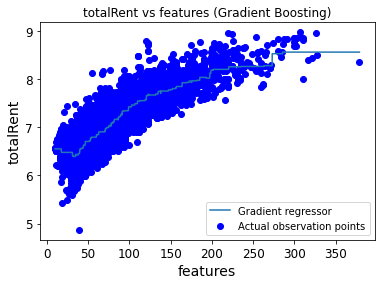

In [67]:
plt.scatter(X_train, y_train, color='blue', label='Actual observation points')
plt.plot(X_grid, gradient_regressor.predict(X_grid), label='Gradient regressor')
plt.title('totalRent vs features (Gradient Boosting)')
plt.xlabel('features')
plt.ylabel('totalRent')

plt.legend()
plt.show()

## more models --------------------------------------------------------------------- end of final models

In [347]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingRegressor

def gradientboostingmachine(md, msl, n, mf, lr, xtrain, ytrain, xtest, ytest):
    gbm_best = GradientBoostingRegressor(n_estimators=n, random_state=1111,
                                         max_depth=md, max_features=mf, 
                                         min_samples_leaf=msl, learning_rate=lr
                                         )
    gbm_best.fit(xtrain, ytrain)
    y_pred_gbm = gbm_best.predict(xtest)
    print('MAE:', metrics.mean_absolute_error(ytest, y_pred_gbm))
    print('MSE:', metrics.mean_squared_error(ytest, y_pred_gbm))
    
#gradientboostingmachine(16, 117, 73, 10, 0.07, X_train, y_train, X_test, y_test)
gradientboostingmachine(16, 117, 157, 5, 0.07, X_train, y_train, X_test, y_test)


MAE: 0.042135882104922445
MSE: 0.0037249508966189712


In [348]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()


scores = cross_val_score(lin_reg, X_train, y_train,
                        scoring="neg_mean_squared_error", cv=10)

# find root mean squared error, scores is an array of negative numbers
rmse_scores = np.sqrt(-scores)

print("Mean:\t\t ", rmse_scores.mean(), "\nStandard Deviation:", rmse_scores.std())


Mean:		  0.18007506769322273 
Standard Deviation: 0.009614603057439854


In [412]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

y_var = ['logRent']
X_var = ['balcony', 'hasKitchen', 'cellar', 'livingSpace', 'noRooms', 'garden', 'baseRent', 
         'refurbished', 'greatInterior', 'newlyConst',
         '2018_ads', 'lift']

y = Berlin[y_var].iloc[:,0].values
X = Berlin[X_var].iloc[:,3].values

#print(X)
#print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=0)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7772,)
(1943,)
(7772,)
(1943,)


In [ ]:
y_var = ['logRent']
X_var = ['balcony', 'hasKitchen', 'cellar', 'livingSpace', 'noRooms', 'garden',
         'refurbished', 'greatInterior', 'newlyConst',
         '2018_ads', 'lift']

y = Berlin[y_var].iloc[:,0].values
X = Berlin[X_var].iloc[:,3:4].values



## Simple Vector Regression

In [78]:
from sklearn.svm import SVR

scale_X = StandardScaler()
scale_y = StandardScaler()

X = scale_X.fit_transform(X.reshape(-1,1))
y = scale_y.fit_transform(y.reshape(-1,1))

In [79]:
svr_regressor = SVR(kernel='rbf', gamma='auto')
svr_regressor.fit(X, y)

SVR(gamma='auto')

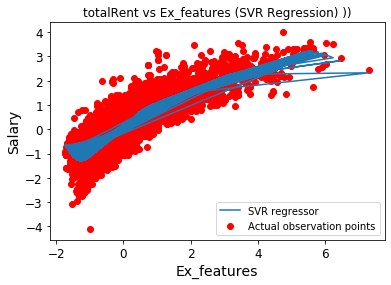

In [80]:
plt.scatter(X, y, color='red', label='Actual observation points')
plt.plot(X, svr_regressor.predict(X), label='SVR regressor')
plt.title('totalRent vs Ex_features (SVR Regression) ))')
plt.xlabel('Ex_features')
plt.ylabel('Salary')

plt.legend()
plt.show()

## Decision Tree - Regression

In [81]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(random_state = 0)
tree_regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

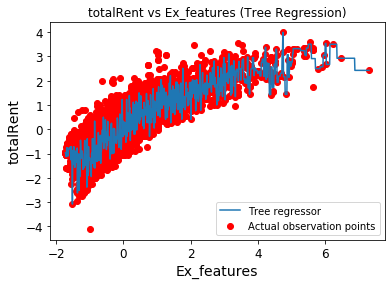

In [82]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)

plt.scatter(X, y, color='red', label='Actual observation points')
plt.plot(X_grid, tree_regressor.predict(X_grid), label='Tree regressor')
plt.title('totalRent vs Ex_features (Tree Regression)')
plt.xlabel('Ex_features')
plt.ylabel('totalRent')

plt.legend()
plt.show()